In [1]:
# Import the functions used in this project
import awesome_functions as af

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle as pkl
slack_url = pkl.load(open("Slack_url/send_url.pickle", "rb"))

import xgboost

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [3]:
from sklearn.metrics import log_loss
from sklearn.naive_bayes import MultinomialNB
def fitNaiveBayesModel(X, y):
    return MultinomialNB().fit(X, y)
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

In [5]:
def getColsToFit(df, is_need_return = True):
    if is_need_return:
        return [col for col in df.columns if col not in ["VisitNumber", "TripType"]]
    return [col for col in df.columns if col not in ["VisitNumber", "TripType", "Return"]]

In [66]:
cols_fl = getColsToFit(df_train_fl, is_need_return = True)
cols_dd = getColsToFit(df_train_dd, is_need_return = True)
cols_fl_no_return = getColsToFit(df_train_fl, is_need_return = False)
cols_dd_no_return = getColsToFit(df_train_dd, is_need_return = False)

In [2]:
df_train_dd = pd.read_csv("Feature_matrix/df_train_dd_201807291831.csv")
df_test_dd = pd.read_csv("Feature_matrix/df_test_dd_201807291855.csv")
df_train_fl = pd.read_csv("Feature_matrix/df_train_fl_201807291845.csv")
df_test_fl = pd.read_csv("Feature_matrix/df_test_fl_201807291908.csv")

In [39]:
train_dd = df_train_dd.copy()

In [8]:
sc_cnt = df_train.groupby("VisitNumber").sum()["ScanCount"]

In [13]:
sc_cnt[sc_cnt <= 0] = 1

In [32]:
sc_cnt = sc_cnt.reset_index()

In [40]:
train_dd[cols_dd_no_return[:-7]] = train_dd[cols_dd_no_return[:-7]].div(sc_cnt.ScanCount, axis = 0)

In [43]:
af.saveDataFrameToCsv(train_dd, "Nor_proper_dd")

In [44]:
X, y = af.get_df_to_fit(train_dd)

In [49]:
X_1, y = af.get_df_to_fit(df_train_dd)

In [45]:
model_nb_1 = fitNaiveBayesModel(X, y)

In [50]:
model_nb_2 = fitNaiveBayesModel(X_1, y)

In [46]:
y_pred_1 = model_nb_1.predict(X)

In [55]:
y_pred_1_1 = model_nb_1.predict(X_1)

In [51]:
y_pred_2 = model_nb_2.predict(X_1)

In [57]:
y_pred_2_1 = model_nb_2.predict(X)

##### 정규화 시켜서 만든 모델에 정규화된 feature를 넣었을 때

In [48]:
af.getAccuracy(y, y_pred_1, len(X))

##### Accuracy : 0.4198

##### 정규화 시켜서 만든 모델에 정규화되지않은 feature을 넣었을 때

In [56]:
af.getAccuracy(y, y_pred_1_1, len(X))

##### Accuracy : 0.5274

In [52]:
af.getAccuracy(y, y_pred_2, len(X))

##### Accuracy : 0.5805

In [58]:
af.getAccuracy(y, y_pred_2_1, len(X))

##### Accuracy : 0.3765

In [54]:
X

,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0
1,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0
2,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0
3,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0
4,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0
5,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0
6,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.285714,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0
7,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0
8,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0
9,0,0.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0,0,0,0,1,0,0


In [53]:
X_1

,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 이제부터 FL

In [59]:
X, y = af.get_df_to_fit(df_train_fl)

In [60]:
model_fl_1 = fitNaiveBayesModel(X, y)

In [61]:
y_pred_fl_1 = model_fl_1.predict(X)

In [62]:
af.getAccuracy(y, y_pred_fl_1, len(X))

##### Accuracy : 0.6345

In [71]:
train_fl = df_train_fl.copy()

In [77]:
df_train["FinelineNumber"].describe()

count    642925.000000
mean       3726.884567
std        2780.966158
min           0.000000
25%        1404.000000
50%        3352.000000
75%        5501.000000
max        9998.000000
Name: FinelineNumber, dtype: float64

In [86]:
half_up_fl = df_train[df_train["FinelineNumber"] > 3352.0]

In [120]:
len(half_up_fl["DepartmentDescription"].unique())

65

In [87]:
half_down_fl = df_train[df_train["FinelineNumber"] < 3352.0]

In [121]:
len(half_down_fl["DepartmentDescription"].unique())

64

In [97]:
half_up_fl_tt_order = half_up_fl.groupby("TripType").size().reset_index(name="count").sort_values("count", ascending = False)

In [98]:
half_down_fl_tt_order = half_down_fl.groupby("TripType").size().reset_index(name="count").sort_values("count", ascending = False)

In [105]:
half_up_fl_tt_order.reset_index(drop=True, inplace= True)

In [106]:
half_down_fl_tt_order.reset_index(drop=True, inplace= True)

In [132]:
tmp = df_train.groupby(["TripType", "DepartmentDescription", "FinelineNumber"]).sum()["ScanCount"].reset_index()

In [364]:
tmp_pivot = tmp.pivot_table(values="ScanCount", index="TripType", columns="FinelineNumber", aggfunc=np.sum, fill_value=0)

In [143]:
tmp_pivot.index

Int64Index([  3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  18,  19,  20,
             21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
             34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44, 999],
           dtype='int64', name='TripType')

In [358]:
tmp_pivot

FinelineNumber,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,9964.0,9966.0,9967.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0
TripType,,,,,,,,,,,,,,,,,,,,,
3,807,0,76,1,0,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,51,3,3,1,1,8,6,0,0,0,...,0,0,0,1,0,0,0,0,1,1
6,16,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,66,4,2,0,0,3,2,0,0,1,...,0,0,0,0,0,0,0,0,0,3
8,0,39,3,2,0,32,4,3,2,0,...,0,0,0,0,0,0,0,0,1,1
9,3,12,5,3,7,12,40,3,8,5,...,0,0,0,3,0,5,2,0,1,40
12,7,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [365]:
tmp_pivot.columns

Float64Index([   0.0,    1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,
                 8.0,    9.0,
              ...
              9964.0, 9966.0, 9967.0, 9970.0, 9971.0, 9974.0, 9975.0, 9991.0,
              9997.0, 9998.0],
             dtype='float64', name='FinelineNumber', length=5195)

In [378]:
for col in tmp_pivot.columns:
    tmp_pivot[col] = tmp_pivot[col]/tmp_pivot[col].sum()

In [379]:
tmp_pivot

FinelineNumber,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,9964.0,9966.0,9967.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0
TripType,,,,,,,,,,,,,,,,,,,,,
3,0.214172,0.000000,0.360190,0.009804,0.000000,0.000000,0.006289,0.000000,0.000000,0.000000,...,0.0,0.000,0.0,0.000000,0.000000,0.013514,0.000000,0.0,0.000000,0.0000
4,0.001327,0.000000,0.000000,0.000000,0.010526,0.000000,0.002096,0.000000,0.000000,0.000000,...,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000
5,0.013535,0.005848,0.014218,0.009804,0.005263,0.018265,0.012579,0.000000,0.000000,0.000000,...,0.0,0.000,0.0,0.012346,0.000000,0.000000,0.000000,0.0,0.018868,0.0025
6,0.004246,0.000000,0.000000,0.000000,0.005263,0.002283,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000,0.0,0.000000,0.000000,0.013514,0.000000,0.0,0.000000,0.0000
7,0.017516,0.007797,0.009479,0.000000,0.000000,0.006849,0.004193,0.000000,0.000000,0.027778,...,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0075
8,0.000000,0.076023,0.014218,0.019608,0.000000,0.073059,0.008386,0.040541,0.032787,0.000000,...,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.018868,0.0025
9,0.000796,0.023392,0.023697,0.029412,0.036842,0.027397,0.083857,0.040541,0.131148,0.138889,...,0.0,0.000,0.0,0.037037,0.000000,0.067568,0.057143,0.0,0.018868,0.1000
12,0.001858,0.000000,0.000000,0.000000,0.000000,0.000000,0.008386,0.000000,0.000000,0.000000,...,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000
14,0.000531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000


In [362]:
tmp_pivot[0.0] = tmp_pivot[0.0]/tmp_pivot[0.0].sum()

In [366]:
fl_top_5 = pd.read_csv("Feature_matrix/fineline_top5_df.csv")

In [370]:
fl_top_5 = [str(col) for col in list(fl_top_5["list"].values)]

In [371]:
fl_top_5

['0.0',
 '514.0',
 '4100.0',
 '1029.0',
 '10.0',
 '8720.0',
 '3601.0',
 '3600.0',
 '1555.0',
 '7700.0',
 '1021.0',
 '22.0',
 '31.0',
 '3120.0',
 '2045.0',
 '55.0',
 '571.0',
 '9803.0',
 '6219.0',
 '1101.0',
 '6226.0',
 '3155.0',
 '1110.0',
 '601.0',
 '1118.0',
 '3168.0',
 '1121.0',
 '100.0',
 '102.0',
 '103.0',
 '3176.0',
 '3175.0',
 '8814.0',
 '110.0',
 '115.0',
 '630.0',
 '7803.0',
 '5113.0',
 '1156.0',
 '135.0',
 '1165.0',
 '1169.0',
 '150.0',
 '1181.0',
 '6303.0',
 '5805.0',
 '1200.0',
 '702.0',
 '8904.0',
 '203.0',
 '8910.0',
 '5330.0',
 '723.0',
 '1748.0',
 '4822.0',
 '4825.0',
 '7905.0',
 '1260.0',
 '8430.0',
 '1264.0',
 '8945.0',
 '250.0',
 '1805.0',
 '7949.0',
 '9998.0',
 '275.0',
 '276.0',
 '277.0',
 '278.0',
 '1303.0',
 '281.0',
 '285.0',
 '5410.0',
 '808.0',
 '4905.0',
 '1835.0',
 '302.0',
 '816.0',
 '818.0',
 '3903.0',
 '324.0',
 '8005.0',
 '9546.0',
 '8010.0',
 '8012.0',
 '8014.0',
 '8018.0',
 '8022.0',
 '8023.0',
 '7010.0',
 '6002.0',
 '3452.0',
 '5501.0',
 '1407.0',
 '9

In [363]:
tmp_pivot[0.0]

TripType
3      0.214172
4      0.001327
5      0.013535
6      0.004246
7      0.017516
8      0.000000
9      0.000796
12     0.001858
14     0.000531
15     0.014066
18     0.008227
19     0.005042
20     0.011146
21     0.006900
22     0.016720
23     0.001592
24     0.032909
25     0.052548
26     0.006104
27     0.008493
28     0.008227
29     0.005573
30     0.014066
31     0.005839
32     0.021231
33     0.012473
34     0.008493
35     0.017516
36     0.032113
37     0.031051
38     0.028662
39     0.115180
40     0.134289
41     0.008758
42     0.030520
43     0.024682
44     0.033174
999    0.050425
Name: 0.0, dtype: float64

In [318]:
sum_fl = []
for i in tmp_pivot.columns:
    sum_fl.append(tmp_pivot.loc[i].sum())

In [380]:
for i in tmp_pivot.index:
    weight = tt_info[tt_info["TripType"] == i]["Ratio"].values[0]
    tmp_pivot.loc[i] = tmp_pivot.loc[i].values/weight

In [381]:
tmp_pivot

FinelineNumber,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,9964.0,9966.0,9967.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0
TripType,,,,,,,,,,,,,,,,,,,,,
3,5.624675,0.000000,9.459450,0.257475,0.000000,0.000000,0.165172,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354898,0.000000,0.000000,0.000000,0.000000
4,0.366925,0.000000,0.000000,0.000000,2.910678,0.000000,0.579695,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.281940,0.121815,0.296167,0.204220,0.109634,0.380464,0.262018,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.257165,0.000000,0.000000,0.000000,0.000000,0.393026,0.052076
6,0.318135,0.000000,0.000000,0.000000,0.394321,0.171052,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.012445,0.000000,0.000000,0.000000,0.000000
7,0.291345,0.129693,0.157660,0.000000,0.000000,0.113926,0.069741,0.000000,0.000000,0.462033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.124749
8,0.000000,0.598097,0.111857,0.154260,0.000000,0.574778,0.065973,0.318944,0.257944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148439,0.019668
9,0.008049,0.236474,0.239556,0.297331,0.372446,0.276966,0.847736,0.409835,1.325804,1.404063,...,0.000000,0.000000,0.000000,0.374417,0.000000,0.683058,0.577672,0.000000,0.190741,1.010926
12,0.660737,0.000000,0.000000,0.000000,0.000000,0.000000,2.982519,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,12.695594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [330]:
tmp_pivot

FinelineNumber,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,9966.0,9967.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0,total
TripType,,,,,,,,,,,,,,,,,,,,,
3,2.911633,0.000000,0.274206,0.003608,0.000000,0.000000,0.010824,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003608,0.000000,0.000000,0.000000,0.000000,26.262421
4,1.337110,0.000000,0.000000,0.000000,0.534844,0.000000,0.267422,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.514451
5,0.081770,0.004810,0.004810,0.001603,0.001603,0.012827,0.009620,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001603,0.000000,0.000000,0.000000,0.000000,0.001603,0.001603,20.830394
6,0.303400,0.000000,0.000000,0.000000,0.018963,0.018963,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.018963,0.000000,0.000000,0.000000,0.000000,74.920908
7,0.040606,0.002461,0.001230,0.000000,0.000000,0.001846,0.001230,0.000000,0.000000,0.000615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001846,16.633171
8,0.000000,0.013070,0.001005,0.000670,0.000000,0.010724,0.001341,0.001005,0.000670,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000335,0.000335,7.867281
9,0.001791,0.007162,0.002984,0.001791,0.004178,0.007162,0.023874,0.001791,0.004775,0.002984,...,0.000000,0.000000,0.001791,0.000000,0.002984,0.001194,0.000000,0.000597,0.023874,10.109256
12,0.998259,0.000000,0.000000,0.000000,0.000000,0.000000,0.570434,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,355.665428
14,576.349398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23918.500000


In [324]:
tmp_pivot.loc[3].loc["total"]

7279

In [320]:
tmp_pivot["total"] = sum_fl

In [331]:
tmp_pivot.loc[3]

FinelineNumber
0.0        2.911633
1.0        0.000000
2.0        0.274206
3.0        0.003608
4.0        0.000000
5.0        0.000000
6.0        0.010824
7.0        0.000000
8.0        0.000000
9.0        0.000000
10.0       0.003608
11.0       0.000000
12.0       0.000000
13.0       0.000000
14.0       0.000000
15.0       0.000000
16.0       0.000000
17.0       0.000000
18.0       0.000000
19.0       0.000000
20.0       0.003608
21.0       0.000000
22.0       0.000000
23.0       0.000000
24.0       0.000000
25.0       0.000000
26.0       0.000000
27.0       0.000000
28.0       0.000000
29.0       0.000000
            ...    
9925.0     0.000000
9926.0     0.003608
9927.0     0.000000
9928.0     0.000000
9929.0     0.000000
9930.0     0.000000
9931.0     0.000000
9932.0     0.000000
9933.0     0.000000
9934.0     0.003608
9936.0     0.000000
9937.0     0.000000
9938.0     0.000000
9941.0     0.000000
9942.0     0.000000
9943.0     0.000000
9944.0     0.000000
9960.0     0.000000
9961.

In [327]:
tmp_pivot.loc[3]

FinelineNumber
0.0        807
1.0          0
2.0         76
3.0          1
4.0          0
5.0          0
6.0          3
7.0          0
8.0          0
9.0          0
10.0         1
11.0         0
12.0         0
13.0         0
14.0         0
15.0         0
16.0         0
17.0         0
18.0         0
19.0         0
20.0         1
21.0         0
22.0         0
23.0         0
24.0         0
25.0         0
26.0         0
27.0         0
28.0         0
29.0         0
          ... 
9925.0       0
9926.0       1
9927.0       0
9928.0       0
9929.0       0
9930.0       0
9931.0       0
9932.0       0
9933.0       0
9934.0       1
9936.0       0
9937.0       0
9938.0       0
9941.0       0
9942.0       0
9943.0       0
9944.0       0
9960.0       0
9961.0       0
9964.0       0
9966.0       0
9967.0       0
9970.0       0
9971.0       0
9974.0       1
9975.0       0
9991.0       0
9997.0       0
9998.0       0
total     7279
Name: 3, Length: 5196, dtype: int64

In [382]:
fl_li = []
for i in tmp_pivot.index:
    threshold = 0.8
    df_ = tmp_pivot.loc[i].reset_index(name = "Count")
    df_ = df_[df_["Count"] != 0]
#     total_count = df_["Count"].sum()
    li = list(df_.sort_values("Count", ascending=False)["FinelineNumber"].values)[:100]
    fl_li.append(li)
#     tmp_pivot.loc[i].reset_index(name = "Count").sort_values("Count", ascending=False)["FinelineNumber"]

In [383]:
len(fl_li)

38

In [384]:
li = []
for li_ in fl_li:
    for l in li_:
        li.append(l)

In [385]:
len(li)

3736

In [386]:
len(set(li))

3027

In [356]:
print(fl_li)

['0.0', '1.0', '2.0', '4.0', '5.0', '6.0', '8199.0', '8200.0', '10.0', '8203.0', '8204.0', '12.0', '14.0', '15.0', '16.0', '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '8215.0', '27.0', '28.0', '29.0', '30.0', '31.0', '33.0', '34.0', '35.0', '36.0', '43.0', '44.0', '50.0', '52.0', '53.0', '55.0', '57.0', '8249.0', '59.0', '60.0', '8250.0', '8251.0', '8255.0', '65.0', '70.0', '8263.0', '8264.0', '8266.0', '8267.0', '78.0', '79.0', '82.0', '8275.0', '84.0', '85.0', '86.0', '89.0', '90.0', '8286.0', '96.0', '100.0', '101.0', '102.0', '103.0', '104.0', '105.0', '8294.0', '107.0', '108.0', '109.0', '110.0', '8303.0', '112.0', '8304.0', '114.0', '115.0', '113.0', '8302.0', '117.0', '120.0', '121.0', '8314.0', '125.0', '8317.0', '127.0', '128.0', '126.0', '130.0', '131.0', '132.0', '134.0', '135.0', '136.0', '140.0', '142.0', '143.0', '8336.0', '145.0', '8340.0', '150.0', '151.0', '165.0', '170.0', '8365.0', '177.0', '180.0', '190.0', '8390.0', '199.0', '200.0', '201.0', '202.0', '203.0', 

In [387]:
len(fl_li)

38

In [388]:
fl_li = list(set(li))

In [389]:
fl_li = [str(li) for li in fl_li]

In [341]:
fl_li.remove("total")

In [339]:
cols_mask = ["VisitNumber", "Return", "TripType", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [390]:
test_new_df = pd.concat([df_train_fl[cols_mask], df_train_fl[fl_li]], axis = 1)

In [396]:
X, y = af.get_df_to_fit(test_new_df) 

In [397]:
model = fitNaiveBayesModel(X, y)

In [398]:
y_pred = model.predict(X)

In [399]:
af.getAccuracy(y, y_pred, len(X))

##### Accuracy : 0.6199

In [395]:
test_new_df = pd.concat([df_train_dd, df_train_fl[fl_li]], axis = 1)

In [377]:
test_new_df

,VisitNumber,TripType,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,...,6115.0,1508.0,5092.0,3555.0,9704.0,5620.0,1017.0,7677.0,4606.0,4607.0
0,5,999,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,26,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,1,0
3,9,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,12,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19,42,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
model = fitNaiveBayesModel(csr_train, y)

In [306]:
y_pred = model.predict(csr_train)

In [372]:
test_new_df = pd.concat([df_train_dd, df_train_fl[fl_top_5]], axis = 1)

In [410]:
from scipy.sparse import csr_matrix
csr_train = csr_matrix(X)
csr_train

<95674x80 sparse matrix of type '<class 'numpy.int64'>'
	with 700560 stored elements in Compressed Sparse Row format>

In [411]:
model_xgb.fit(csr_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [412]:
y_pred = model_xgb.predict(csr_train)

In [413]:
af.getAccuracy(y, y_pred, len(X))

##### Accuracy : 0.6905

In [291]:
tt_info = df_train.groupby(["VisitNumber", "TripType"]).size().reset_index(name="Count").sort_values("Count",ascending=False).reset_index()

In [292]:
tt_info.drop("index", axis =1, inplace=True)

In [298]:
tt_info = tt_info.groupby("TripType").size().reset_index(name="Count")

In [275]:
X

,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,8135.0,8154.0,8155.0,8156.0,8157.0,8158.0,8159.0,8160.0,8163.0,8169.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
tt_info["Ratio"]=tt_info["Count"].apply(lambda a : a / 95674)

In [311]:
tt_info.sort_values("Ratio", ascending=False)

,TripType,Count,Ratio
5,8,12161,0.127109
31,39,9896,0.103435
6,9,9464,0.098919
37,999,8444,0.088258
32,40,6130,0.064072
4,7,5752,0.060121
2,5,4593,0.048007
17,25,3698,0.038652
0,3,3643,0.038077
28,36,3005,0.031409


In [274]:
test_new_df

,VisitNumber,TripType,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,...,8135.0,8154.0,8155.0,8156.0,8157.0,8158.0,8159.0,8160.0,8163.0,8169.0
0,5,999,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,26,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,12,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19,42,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:
tt_info

,TripType,Count,Ratio
0,3,3643,0.038077
1,4,346,0.003616
2,5,4593,0.048007
3,6,1277,0.013347
4,7,5752,0.060121
5,8,12161,0.127109
6,9,9464,0.098919
7,12,269,0.002812
8,14,4,0.000042
9,15,978,0.010222


In [409]:
X, y = af.get_df_to_fit(gaza_df)

In [406]:
gaza_df = pd.read_csv("Feature_matrix/df_train_dd_imporved_201808031934.csv")

In [408]:
gaza_df = gaza_df.drop("Ratio", axis = 1)
gaza_df

,VisitNumber,TripType,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,MF_FinelineNumber,ScanCount,Total
0,5,999,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1000,-1,-1
1,7,30,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4504,1,2
2,8,26,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1017,5,28
3,9,8,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,103,1,3
4,10,8,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,115,1,3
5,11,35,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,110,1,4
6,12,41,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,203,1,7
7,15,21,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,514,3,9
8,17,6,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3352,1,4
9,19,42,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,8904,2,9


In [414]:
X

,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,MF_FinelineNumber,ScanCount,Total
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1000,-1,-1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4504,1,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1017,5,28
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,103,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,115,1,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,110,1,4
6,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,203,1,7
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,514,3,9
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3352,1,4
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,8904,2,9


In [415]:
from sklearn.ensemble import RandomForestClassifier

In [417]:
y

0        999
1         30
2         26
3          8
4          8
5         35
6         41
7         21
8          6
9         42
10         7
11         9
12         8
13        39
14        25
15         8
16         9
17         8
18         8
19         8
20         8
21         8
22         8
23        38
24         8
25        35
26        15
27         9
28         8
29         8
        ... 
95644     21
95645     44
95646      8
95647     44
95648     40
95649     26
95650      8
95651      8
95652     36
95653     40
95654     42
95655     36
95656     31
95657      9
95658     42
95659     30
95660      7
95661     38
95662     40
95663     38
95664     24
95665      9
95666     32
95667     38
95668      8
95669     25
95670     22
95671     39
95672     39
95673      8
Name: TripType, Length: 95674, dtype: int64

In [424]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X_ = (X - mean) / std

In [439]:
from sklearn.model_selection import train_test_split , cross_val_score , KFold , GridSearchCV

In [438]:
parameters = {'n_estimators':np.arange(1,100,10),'max_depth':np.arange(1,20,5)}

In [440]:
%%time
kfold = KFold(10)
grid_model = GridSearchCV(forest,parameters,scoring='accuracy',cv=kfold,n_jobs=-1)
grid_model.fit(X_, y)

CPU times: user 54.9 s, sys: 2.24 s, total: 57.2 s
Wall time: 6min 59s


In [441]:
grid_model.cv_results_["mean_test_score"]

array([0.13554362, 0.22707319, 0.24085959, 0.22839016, 0.24379664,
       0.23884232, 0.24514497, 0.23951126, 0.24571984, 0.23013567,
       0.30349938, 0.47270941, 0.476075  , 0.47442356, 0.46622907,
       0.46997094, 0.48036039, 0.47960783, 0.47573008, 0.48039175,
       0.42007233, 0.57031168, 0.57662479, 0.58137007, 0.58349186,
       0.5831992 , 0.58491335, 0.58402492, 0.58522692, 0.58417125,
       0.47329473, 0.62327278, 0.6289483 , 0.63204214, 0.63177039,
       0.63682923, 0.63636934, 0.63659929, 0.63472835, 0.63653657])

In [443]:
grid_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [442]:
grid_model.best_score_

0.6368292326023789

In [472]:
forest = RandomForestClassifier(n_estimators=51, max_depth=17, n_jobs=-1)

In [460]:
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [461]:
y_pred = forest.predict(X)

In [462]:
af.getAccuracy(y, y_pred, len(X))

##### Accuracy : 0.98

In [463]:
log_loss(y, forest.predict_proba(X))

0.20652853573515886

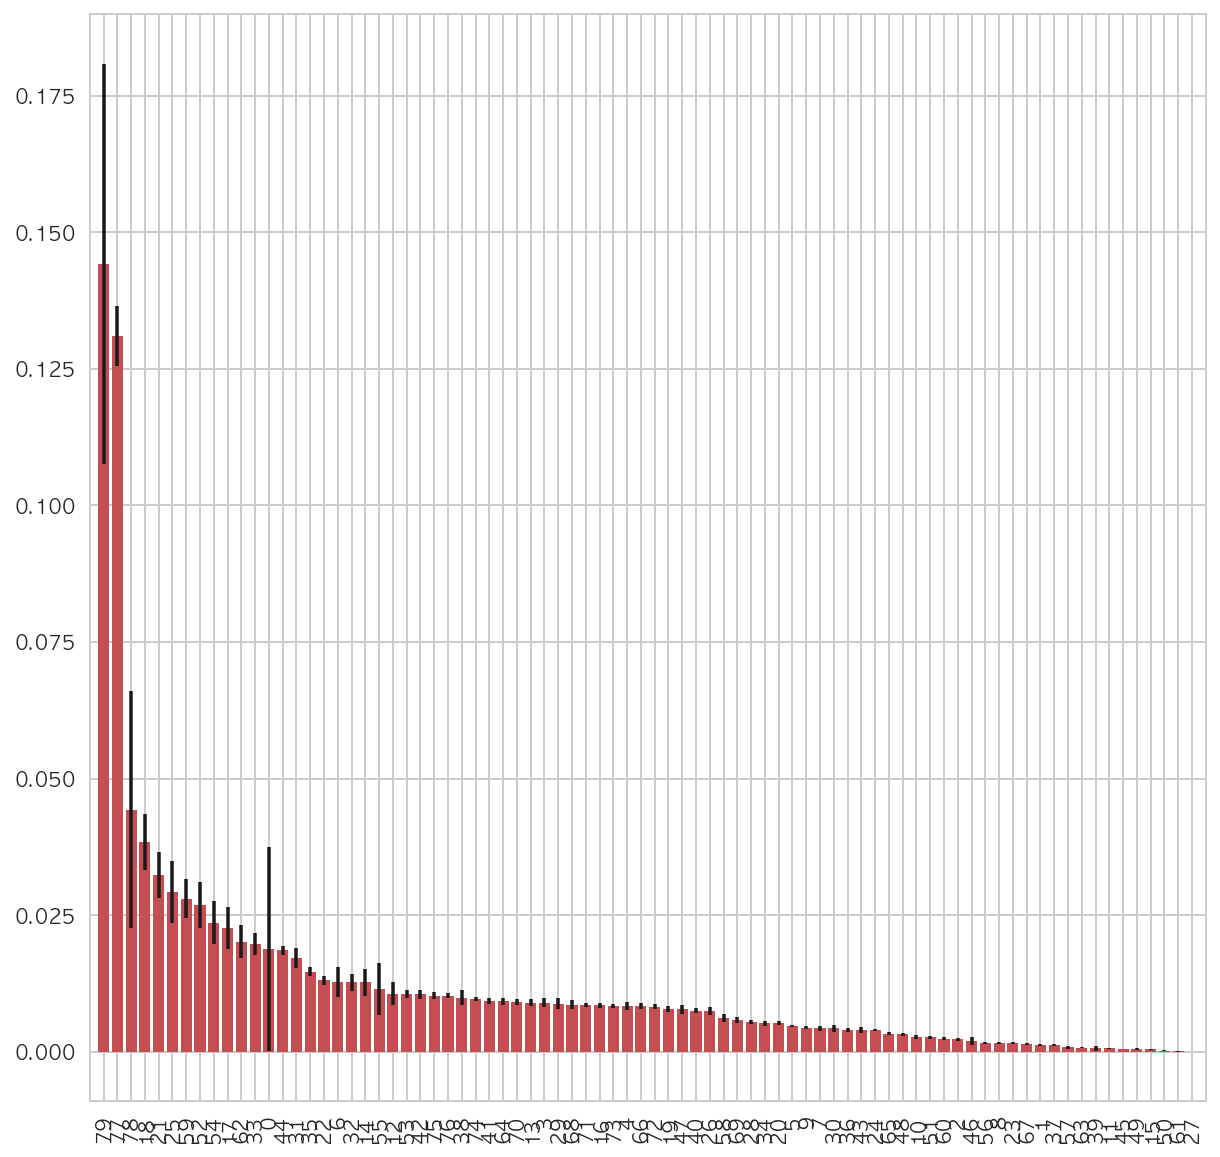

In [431]:
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# print("Feature ranking:")
# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# plt.title("Feature importances")
plt.figure(figsize=(10, 10))
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [437]:
X_

,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,MF_FinelineNumber,ScanCount,Total
0,2.763530,-0.039731,-0.072505,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,-0.092381,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,-0.674866,-1.411194,-0.828318
1,-0.361852,-0.039731,-0.072505,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,-0.092381,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,0.670579,-0.436282,-0.535952
2,2.763530,-0.039731,-0.072505,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,-0.092381,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,-0.668339,1.513542,1.997885
3,-0.361852,-0.039731,-0.072505,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,-0.092381,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,-1.019291,-0.436282,-0.438497
4,-0.361852,-0.039731,-0.072505,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,-0.092381,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,-1.014683,-0.436282,-0.438497
5,-0.361852,-0.039731,-0.072505,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,-0.092381,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,-1.016603,-0.436282,-0.341041
6,-0.361852,-0.039731,-0.072505,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,4.553305,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,-0.980893,-0.436282,-0.048676
7,-0.361852,-0.039731,-0.072505,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,-0.092381,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,-0.861478,0.538630,0.146235
8,-0.361852,-0.039731,-0.072505,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,-0.092381,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,0.228241,-0.436282,-0.341041
9,-0.361852,-0.039731,5.372432,-0.139422,-0.198835,-0.099938,-0.216320,-0.089413,-0.067388,-0.092381,...,-0.379185,-0.37017,-0.371665,-0.364912,2.297877,-0.463246,-0.466904,2.360065,0.051174,0.146235


In [435]:
y_pred = forest.predict_proba(X_)

In [434]:
af.getAccuracy(y, y_pred, len(X_))

##### Accuracy : 0.9795

In [436]:
log_loss(y, y_pred)

0.20391335143670003

In [449]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [450]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_train = lb.fit_transform(y_train)
Y_test = lb.fit_transform(y_test)

# y_pred = lb.inverse_transform(np.round(predictions))
# y_true = lb.inverse_transform(train_y)

from keras.models import Sequential
from keras.layers.core import Dense
# from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.utils import np_utils

Using TensorFlow backend.


In [456]:
model1 = Sequential()
model1.add(Dense(50, input_dim=80, activation="sigmoid", kernel_initializer="glorot_uniform"))
# model1.add(Dense(20, activation="sigmoid"))
model1.add(Dense(38, activation="softmax"))
model1.compile(optimizer=Adagrad(lr=1.1), loss='categorical_crossentropy', metrics=["accuracy"])

In [457]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/100
 - 1s - loss: 12.7452 - acc: 0.1092 - val_loss: 6.4432 - val_acc: 0.0915
Epoch 2/100
 - 1s - loss: 5.7184 - acc: 0.1310 - val_loss: 5.3009 - val_acc: 0.0933
Epoch 3/100
 - 0s - loss: 5.3754 - acc: 0.1409 - val_loss: 5.2947 - val_acc: 0.1573
Epoch 4/100
 - 0s - loss: 5.2280 - acc: 0.1470 - val_loss: 5.3540 - val_acc: 0.1363
Epoch 5/100
 - 0s - loss: 5.2414 - acc: 0.1457 - val_loss: 5.1914 - val_acc: 0.1351
Epoch 6/100
 - 0s - loss: 5.1836 - acc: 0.1509 - val_loss: 5.1888 - val_acc: 0.1598
Epoch 7/100
 - 0s - loss: 5.1829 - acc: 0.1587 - val_loss: 5.1315 - val_acc: 0.1615
Epoch 8/100
 - 0s - loss: 5.1557 - acc: 0.1594 - val_loss: 5.1607 - val_acc: 0.1615
Epoch 9/100
 - 0s - loss: 5.1565 - acc: 0.1576 - val_loss: 5.1610 - val_acc: 0.1655
Epoch 10/100
 - 0s - loss: 5.1459 - acc: 0.1582 - val_loss: 5.1359 - val_acc: 0.1368
Epoch 11/100
 - 0s - loss: 5.2376 - acc: 0.1513 - val_loss: 5.4651 - val_acc: 0.1288
Epoch 12/100
 - 0s - lo

Epoch 97/100
 - 0s - loss: 4.7739 - acc: 0.2723 - val_loss: 4.8399 - val_acc: 0.2570
Epoch 98/100
 - 0s - loss: 4.7621 - acc: 0.2753 - val_loss: 5.1060 - val_acc: 0.1951
Epoch 99/100
 - 0s - loss: 4.7726 - acc: 0.2729 - val_loss: 4.8545 - val_acc: 0.2472
Epoch 100/100
 - 0s - loss: 4.7775 - acc: 0.2754 - val_loss: 4.7773 - val_acc: 0.2687
CPU times: user 1min 10s, sys: 9.88 s, total: 1min 20s
Wall time: 32.9 s


In [458]:
def getNeuralNetworkInfo(hist):
    print("val_acc : ")
    print(np.max(hist.history["val_acc"]))
    print("val_loss : ")
    print(np.min(hist.history["val_loss"]))
    plt.plot(hist.history['loss'])
    plt.show()
    plt.plot(hist.history['acc'], 'b-', label="training")
    plt.plot(hist.history['val_acc'], 'r:', label="test")
    plt.legend()
    plt.show()

In [464]:
df_upc = pd.read_csv("Feature_matrix/df_new_upc_201808040005.csv")

In [467]:
X

,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,MF_FinelineNumber,ScanCount,Total
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1000,-1,-1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4504,1,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1017,5,28
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,103,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,115,1,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,110,1,4
6,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,203,1,7
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,514,3,9
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3352,1,4
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,8904,2,9


In [471]:
tmp_try = pd.concat([X, df_upc["MF_Company"]], axis = 1).drop("ScanCount", axis = 1)

In [493]:
forest.fit(tmp_try, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [494]:
y_pred = forest.predict(tmp_try)

In [495]:
af.getAccuracy(y, y_pred, len(X))

##### Accuracy : 0.7314

In [496]:
log_loss(y, forest.predict_proba(tmp_try))

1.1251806498458523

In [497]:
model_new_xgb = xgboost.XGBClassifier(n_estimators=50, max_depth=17, n_jobs=4)

In [498]:
csr_tmp = csr_matrix(tmp_try)

In [499]:
model_new_xgb.fit(csr_tmp, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=17, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=4, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [500]:
y_pred = model_new_xgb.predict(csr_tmp)

In [501]:
af.getAccuracy(y, y_pred, len(X))

##### Accuracy : 0.9455

In [502]:
y_pred_proba = model_new_xgb.predict_proba(csr_tmp)

In [503]:
log_loss(y, y_pred_proba)

0.30531439374617414

In [505]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(csr_tmp, y, test_size=0.33, random_state=42)

In [506]:
y_pred_test = model_new_xgb.predict(X_test)

In [477]:
model_xgb.fit(tmp_try, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [479]:
y_pred_xgb = model_xgb.predict(tmp_try)

In [480]:
af.getAccuracy(y, y_pred_xgb, len(X))

##### Accuracy : 0.6838

314

In [491]:
tmp_try = tmp_try.drop("MENSWEAR", axis = 1)

In [492]:
tmp_try

,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,MF_FinelineNumber,Total,MF_Company
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1000,-1,68113
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4504,2,60538
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1017,28,3270
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,103,3,1070
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,115,3,2800
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,110,4,2840
6,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,203,7,1920
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,514,9,2898
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3352,4,1200
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,8904,9,7675


In [537]:
def checksum(x):
    try:
        odd = map(int, ','.join(x[-1::-2]).split(','))
        even = map(int, ','.join(x[-2::-2]).split(','))
        sum_odd3 = sum(odd) * 3
        total = sum_odd3 + sum(even)
        rem = total % 10
        if rem == 0:
            return rem
        return 10 - rem
    except:
        return -9999

In [513]:
x = df_train["Upc"][0]

In [521]:
str(x)

'68113152929.0'

In [546]:
str(x)[::2]

'6135990'

In [544]:
str(x)[-2::-2]

'.22118'

In [515]:
str(x)[-1::-2]

'0995316'

In [514]:
x[-1::-2]

IndexError: invalid index to scalar variable.

In [545]:
checksum(str(x).split(".")[0])

7